In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import pandas as pd

data = pd.read_csv(
    'https://raw.githubusercontent.com/Garve/datasets/4576d323bf2b66c906d5130d686245ad205505cf/mmm.csv',
    parse_dates=['Date'],
    index_col='Date'
)

X = data.drop(columns=['Sales'])
y = data['Sales']

lr = LinearRegression()

print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))

[0.69594303 0.69302285 0.66850729 0.78807363 0.73512387]


In [3]:
lr.fit(X, y) # refit the model with the complete dataset

print('Coefficients:', lr.coef_)

Coefficients: [0.35968382 0.48833246 1.2159193 ]


In [4]:
print('Intercept:', lr.intercept_)

# Output:
# Coefficients: [0.35968382 0.48833246 1.2159193 ]
# Intercept: 6678.396933606161

Intercept: 6678.396933606161


In [11]:
print(lr.predict(([[11543.58, 4615.35, 2518.88]])))

# Output: [16147.01594158]


[16147.01594158]


C:\Users\klime\anaconda3\envs\repy310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
pip install matplotlib

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 7.6/7.6 MB 13.2 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 17.5 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 20.3 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00


In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

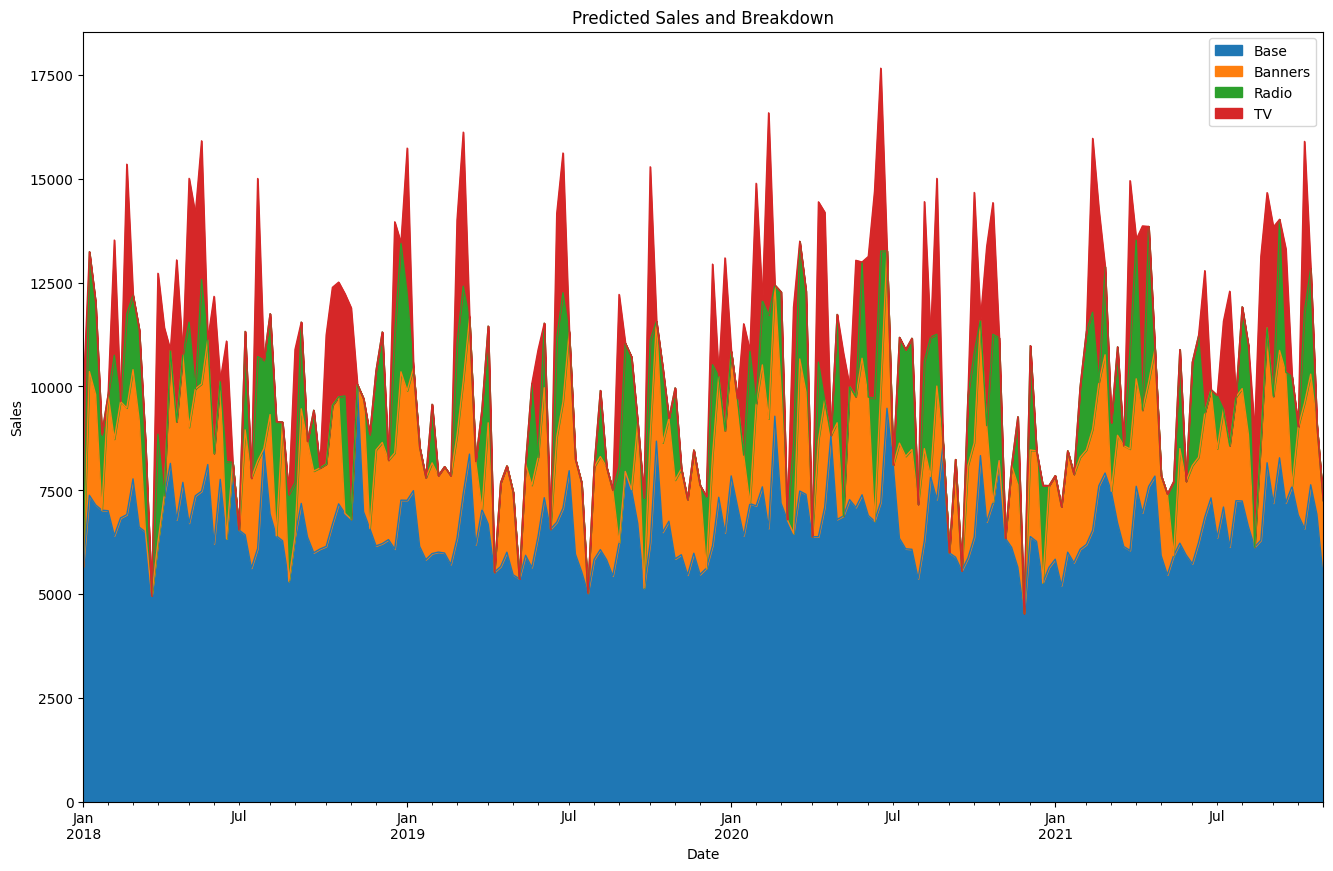

In [10]:
weights = pd.Series(
    lr.coef_,
    index=X.columns
)

base = lr.intercept_

unadj_contributions = X.mul(weights).assign(Base=base)

adj_contributions = (unadj_contributions .div(unadj_contributions.sum(axis=1), axis=0) .mul(y, axis=0))

ax = (adj_contributions[['Base', 'Banners', 'Radio', 'TV']] 
      .plot.area(figsize=(16, 10), linewidth=1, title='Predicted Sales and Breakdown'))

ax.set_xlabel('Date')
ax.set_ylabel('Sales')

In [12]:
class ExponentialSaturation:
    def __init__(self, a=1.):
        self.a = a
        
    def transform(self, X):
        return 1 - np.exp(-self.a*X)

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array

class ExponentialSaturation(BaseEstimator, TransformerMixin):
    def __init__(self, a=1.):
        self.a = a
        
    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True) # from BaseEstimator
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False) # from BaseEstimator
        return  1-np.exp(-self.a*X)

In [14]:
from scipy.signal import convolve2d
import numpy as np

class ExponentialCarryover(BaseEstimator, TransformerMixin):
    def __init__(self, strength=0.5, length=1):
        self.strength = strength
        self.length = length
    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True)
        self.sliding_window_ = (
            self.strength ** np.arange(self.length + 1)
        ).reshape(-1, 1)
        return self

    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        convolution = convolve2d(X, self.sliding_window_)
        if self.length > 0:
            convolution = convolution[: -self.length]
        return convolution

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

adstock = ColumnTransformer(
    [
     ('tv_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['TV']),
     ('radio_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Radio']),
     ('banners_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Banners']),
    ],
    remainder='passthrough'
)

model = Pipeline([
                  ('adstock', adstock),
                  ('regression', LinearRegression())
])

In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

data = pd.read_csv(
    'https://raw.githubusercontent.com/Garve/datasets/4576d323bf2b66c906d5130d686245ad205505cf/mmm.csv',
    parse_dates=['Date'],
    index_col='Date'
)

X = data.drop(columns=['Sales'])
y = data['Sales']

model.fit(X, y)

print(cross_val_score(model, X, y, cv=TimeSeriesSplit()).mean())

# Output: ~0.55

0.5527190073236669


In [18]:
pip install optuna


  Using cached optuna-3.1.0-py3-none-any.whl (365 kB)
     ---------------------------------------- 2.0/2.0 MB 11.3 MB/s eta 0:00:00
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached alembic-1.9.4-py3-none-any.whl (210 kB)
     ---------------------------------------- 78.5/78.5 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 151.7/151.7 kB ? eta 0:00:00
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
     ---------------------------------------- 192.2/192.2 kB ? eta 0:00:00
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
pip install ipywidgets


     -------------------------------------- 137.8/137.8 kB 2.0 MB/s eta 0:00:00
     ------------------------------------- 384.3/384.3 kB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 16.2 MB/s eta 0:00:00


In [23]:
import ipywidgets

In [24]:
import optuna

In [30]:
from optuna.distributions import UniformDistribution, IntUniformDistribution, FloatDistribution, IntDistribution

In [31]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import UniformDistribution, IntUniformDistribution

tuned_model = OptunaSearchCV(
    estimator=model,
    param_distributions={
        'adstock__tv_pipe__carryover__strength': FloatDistribution(0, 1),
        'adstock__tv_pipe__carryover__length': IntDistribution(0, 6),
        'adstock__tv_pipe__saturation__a': FloatDistribution(0, 0.01),
        'adstock__radio_pipe__carryover__strength': FloatDistribution(0, 1),
        'adstock__radio_pipe__carryover__length': IntDistribution(0, 6),
        'adstock__radio_pipe__saturation__a': FloatDistribution(0, 0.01),
        'adstock__banners_pipe__carryover__strength': FloatDistribution(0, 1),
        'adstock__banners_pipe__carryover__length': IntDistribution(0, 6),
        'adstock__banners_pipe__saturation__a': FloatDistribution(0, 0.01),
    },
    n_trials=100,
    cv=TimeSeriesSplit(),
    random_state=0
)


C:\Users\klime\AppData\Local\Temp\ipykernel_3864\1943423216.py:4: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  tuned_model = OptunaSearchCV(


In [32]:
print(cross_val_score(tuned_model, X, y, cv=TimeSeriesSplit()))

# Output: array([0.847353, 0.920507, 0.708728, 0.943805, 0.908159])

C:\Users\klime\anaconda3\envs\repy310\lib\site-packages\sklearn\base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)
[I 2023-02-20 21:37:28,336] A new study created in memory with name: no-name-ed4f9e34-9d78-4609-a58c-0340b6c6f149
[I 2023-02-20 21:37:28,463] Trial 0 finished with value: -347726.5739233337 and parameters: {'adstock__tv_pipe__carryover__strength': 0.4860473230215504, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.009855760506615989, 'adstock__radio_pipe__carryover__strength': 0.1955964101622225, 'adstock__radio_pipe__carryover__length': 4, 'adstock__radio_pipe__saturation__a': 0.00980582177099305, 'adstock__banners_pipe__carryover__strength': 0.18048029738995275, 'adstock__banners_pipe__carryover__length': 4, 'adstock__banners_pipe__saturation__a': 0.008463095456331128}. Best is trial 0 with value: -347726.5739233337.
[I 2

[I 2023-02-20 21:37:30,103] Trial 12 finished with value: 0.43763455865483947 and parameters: {'adstock__tv_pipe__carryover__strength': 0.981630348510859, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.0071254374233609774, 'adstock__radio_pipe__carryover__strength': 0.4129222167126323, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.005690694171813884, 'adstock__banners_pipe__carryover__strength': 0.45428785903912083, 'adstock__banners_pipe__carryover__length': 3, 'adstock__banners_pipe__saturation__a': 8.111975505019605e-05}. Best is trial 10 with value: 0.4509638901227865.
[I 2023-02-20 21:37:30,286] Trial 13 finished with value: -0.17565124091875778 and parameters: {'adstock__tv_pipe__carryover__strength': 0.974113410518705, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.007515109949576203, 'adstock__radio_pipe__carryover__strength': 0.5776718446952127, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:37:32,595] Trial 25 finished with value: -0.5810306756941411 and parameters: {'adstock__tv_pipe__carryover__strength': 0.9951170886085553, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.007513484591556186, 'adstock__radio_pipe__carryover__strength': 0.2810174116953486, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.005771245139794655, 'adstock__banners_pipe__carryover__strength': 0.45605678853712844, 'adstock__banners_pipe__carryover__length': 4, 'adstock__banners_pipe__saturation__a': 0.0006420899366540497}. Best is trial 21 with value: 0.4535863931965123.
[I 2023-02-20 21:37:32,810] Trial 26 finished with value: -0.3109037447830469 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8295517028772771, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005907603737703634, 'adstock__radio_pipe__carryover__strength': 0.5258413718515487, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:37:35,094] Trial 38 finished with value: -0.16078451734338978 and parameters: {'adstock__tv_pipe__carryover__strength': 0.83393641199146, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.008663317039356003, 'adstock__radio_pipe__carryover__strength': 0.5082770218106767, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.004014622421186217, 'adstock__banners_pipe__carryover__strength': 0.11474869056809955, 'adstock__banners_pipe__carryover__length': 1, 'adstock__banners_pipe__saturation__a': 0.0020975368265720292}. Best is trial 35 with value: 0.5861255251318666.
[I 2023-02-20 21:37:35,291] Trial 39 finished with value: -1.3606053098563113e+29 and parameters: {'adstock__tv_pipe__carryover__strength': 0.769688522173698, 'adstock__tv_pipe__carryover__length': 5, 'adstock__tv_pipe__saturation__a': 0.00988235564888745, 'adstock__radio_pipe__carryover__strength': 0.07555075273431011, 'adstock__radio_pipe__carryo

[I 2023-02-20 21:37:37,929] Trial 51 finished with value: 0.5692194904905088 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7751436413495791, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.00776328248839892, 'adstock__radio_pipe__carryover__strength': 0.5665778341558286, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 0.0036648145100931675, 'adstock__banners_pipe__carryover__strength': 0.2362987967165921, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0004413810060514094}. Best is trial 45 with value: 0.6047892322856365.
[I 2023-02-20 21:37:38,155] Trial 52 finished with value: 0.5654923296078966 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8883762146814003, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.00688006934329075, 'adstock__radio_pipe__carryover__strength': 0.4843598533208868, 'adstock__radio_pipe__carryover__l

[I 2023-02-20 21:37:40,741] Trial 64 finished with value: -1.5682645381488124e+22 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7446591805957525, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.006450123769142869, 'adstock__radio_pipe__carryover__strength': 0.6346892683840132, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.002286052247550328, 'adstock__banners_pipe__carryover__strength': 0.06321863701925665, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0029545429301088815}. Best is trial 56 with value: 0.6072171121480389.
[I 2023-02-20 21:37:40,999] Trial 65 finished with value: 0.591679632519732 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8081490744694155, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.007206271303503073, 'adstock__radio_pipe__carryover__strength': 0.6778681933968519, 'adstock__radio_pipe__carryo

[I 2023-02-20 21:37:43,686] Trial 77 finished with value: 0.5826273749403763 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7290931755122384, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.004920490651336682, 'adstock__radio_pipe__carryover__strength': 0.7058393716432668, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.0018112168389302877, 'adstock__banners_pipe__carryover__strength': 0.24846091252849303, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0024382150640371246}. Best is trial 56 with value: 0.6072171121480389.
[I 2023-02-20 21:37:43,921] Trial 78 finished with value: -0.8882619479245284 and parameters: {'adstock__tv_pipe__carryover__strength': 0.5542488396433586, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.006079883463355841, 'adstock__radio_pipe__carryover__strength': 0.8254099804281545, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:37:46,616] Trial 90 finished with value: 0.033712707041765856 and parameters: {'adstock__tv_pipe__carryover__strength': 0.5727356094050514, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005481967930308467, 'adstock__radio_pipe__carryover__strength': 0.6609346840896546, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 0.002227038188013073, 'adstock__banners_pipe__carryover__strength': 0.2626821712025636, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0030941121540723733}. Best is trial 89 with value: 0.6084042594613732.
[I 2023-02-20 21:37:46,834] Trial 91 finished with value: 0.6087424289099868 and parameters: {'adstock__tv_pipe__carryover__strength': 0.6001225543907085, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.004884691367167421, 'adstock__radio_pipe__carryover__strength': 0.7006887007749177, 'adstock__radio_pipe__carryover

[I 2023-02-20 21:37:49,124] Trial 2 finished with value: -0.35862072699620984 and parameters: {'adstock__tv_pipe__carryover__strength': 0.35725476168521175, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__saturation__a': 0.001651149068523966, 'adstock__radio_pipe__carryover__strength': 0.9192135617465139, 'adstock__radio_pipe__carryover__length': 5, 'adstock__radio_pipe__saturation__a': 0.0017677763778372825, 'adstock__banners_pipe__carryover__strength': 0.5057684183863022, 'adstock__banners_pipe__carryover__length': 1, 'adstock__banners_pipe__saturation__a': 0.009897365793712223}. Best is trial 2 with value: -0.35862072699620984.
[I 2023-02-20 21:37:49,283] Trial 3 finished with value: -28.911160293432637 and parameters: {'adstock__tv_pipe__carryover__strength': 0.6947000513172431, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.0008235858666189444, 'adstock__radio_pipe__carryover__strength': 0.25690484812921544, 'adstock__radio_pipe__carryo

[I 2023-02-20 21:37:51,458] Trial 15 finished with value: 0.42916069493385295 and parameters: {'adstock__tv_pipe__carryover__strength': 0.5595125358026946, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005256409315161805, 'adstock__radio_pipe__carryover__strength': 0.11494127419191352, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.006731304358527883, 'adstock__banners_pipe__carryover__strength': 0.9936385812269258, 'adstock__banners_pipe__carryover__length': 4, 'adstock__banners_pipe__saturation__a': 0.00563271373111829}. Best is trial 4 with value: 0.43455406002953667.
[I 2023-02-20 21:37:51,655] Trial 16 finished with value: 0.5010566203009779 and parameters: {'adstock__tv_pipe__carryover__strength': 0.43868640865595915, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.007541251985262749, 'adstock__radio_pipe__carryover__strength': 0.31827735103393673, 'adstock__radio_pipe__carryover

[I 2023-02-20 21:37:54,514] Trial 28 finished with value: 0.4552215899036294 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7224241622990455, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.008012747839780817, 'adstock__radio_pipe__carryover__strength': 0.17088716913290802, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 0.003610588643574464, 'adstock__banners_pipe__carryover__strength': 0.4491552744290634, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.003680911627088733}. Best is trial 19 with value: 0.518426712052864.
[I 2023-02-20 21:37:54,725] Trial 29 finished with value: 0.4408190260561467 and parameters: {'adstock__tv_pipe__carryover__strength': 0.4954084051964685, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.009830481022022547, 'adstock__radio_pipe__carryover__strength': 0.21106887753943604, 'adstock__radio_pipe__carryover__

[I 2023-02-20 21:37:57,710] Trial 41 finished with value: 0.6207005560324067 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7743036185509578, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005557644362428749, 'adstock__radio_pipe__carryover__strength': 0.07566894714455134, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.007063509572913497, 'adstock__banners_pipe__carryover__strength': 0.019177802117916663, 'adstock__banners_pipe__carryover__length': 1, 'adstock__banners_pipe__saturation__a': 0.006735322717199425}. Best is trial 41 with value: 0.6207005560324067.
[I 2023-02-20 21:37:58,069] Trial 42 finished with value: 0.4999162152713407 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7508438675189496, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.005748823096478828, 'adstock__radio_pipe__carryover__strength': 0.06892636706928829, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:38:01,590] Trial 54 finished with value: 0.5040346894905429 and parameters: {'adstock__tv_pipe__carryover__strength': 0.9562862208175068, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005498405589755369, 'adstock__radio_pipe__carryover__strength': 0.16374564363135338, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.008036630781909436, 'adstock__banners_pipe__carryover__strength': 0.039021336935145395, 'adstock__banners_pipe__carryover__length': 2, 'adstock__banners_pipe__saturation__a': 0.007318355403078587}. Best is trial 43 with value: 0.6228287730706727.
[I 2023-02-20 21:38:01,820] Trial 55 finished with value: 0.5655946893888133 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8425672201303658, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005033020829528715, 'adstock__radio_pipe__carryover__strength': 0.24625537773835077, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:38:04,757] Trial 67 finished with value: 0.388715145530551 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8745946383653747, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.003225002885531425, 'adstock__radio_pipe__carryover__strength': 0.09107757363150903, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.008099111313704575, 'adstock__banners_pipe__carryover__strength': 0.14433340140612633, 'adstock__banners_pipe__carryover__length': 4, 'adstock__banners_pipe__saturation__a': 0.0072435775548297795}. Best is trial 43 with value: 0.6228287730706727.
[I 2023-02-20 21:38:04,955] Trial 68 finished with value: 0.5321865765257231 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7840503090124762, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005081186006796467, 'adstock__radio_pipe__carryover__strength': 0.13396365087442094, 'adstock__radio_pipe__carryover

[I 2023-02-20 21:38:07,904] Trial 80 finished with value: 0.3370703972407341 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8093813346296348, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.005604149000169389, 'adstock__radio_pipe__carryover__strength': 0.2237370445230955, 'adstock__radio_pipe__carryover__length': 5, 'adstock__radio_pipe__saturation__a': 0.007715814819099713, 'adstock__banners_pipe__carryover__strength': 0.09340687184017965, 'adstock__banners_pipe__carryover__length': 2, 'adstock__banners_pipe__saturation__a': 0.007818551950509173}. Best is trial 43 with value: 0.6228287730706727.
[I 2023-02-20 21:38:08,163] Trial 81 finished with value: 0.6144793715309497 and parameters: {'adstock__tv_pipe__carryover__strength': 0.772535718562811, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005974436652280477, 'adstock__radio_pipe__carryover__strength': 0.36870394252240607, 'adstock__radio_pipe__carryover__

[I 2023-02-20 21:38:11,227] Trial 93 finished with value: -3.7613520521677036e+23 and parameters: {'adstock__tv_pipe__carryover__strength': 0.842325061917767, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.005673065022125274, 'adstock__radio_pipe__carryover__strength': 0.4114575497133231, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.006754201394870623, 'adstock__banners_pipe__carryover__strength': 0.016430564239350146, 'adstock__banners_pipe__carryover__length': 2, 'adstock__banners_pipe__saturation__a': 0.006758319634742303}. Best is trial 43 with value: 0.6228287730706727.
[I 2023-02-20 21:38:11,440] Trial 94 finished with value: 0.5606652489786721 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8710394521572657, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.005388124414400857, 'adstock__radio_pipe__carryover__strength': 0.3540093692399092, 'adstock__radio_pipe__carryo

[I 2023-02-20 21:38:13,596] Trial 5 finished with value: 0.49103713198112964 and parameters: {'adstock__tv_pipe__carryover__strength': 0.188432092033039, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.006085930330700066, 'adstock__radio_pipe__carryover__strength': 0.69846627060575, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.0014944200580302193, 'adstock__banners_pipe__carryover__strength': 0.24357103792509316, 'adstock__banners_pipe__carryover__length': 2, 'adstock__banners_pipe__saturation__a': 0.0021502093650281797}. Best is trial 4 with value: 0.5512210189252202.
[I 2023-02-20 21:38:13,776] Trial 6 finished with value: 0.37735604401642353 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7489259045868862, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.003709727763516032, 'adstock__radio_pipe__carryover__strength': 0.47356303881897854, 'adstock__radio_pipe__carryover__l

[I 2023-02-20 21:38:16,196] Trial 18 finished with value: 0.6009338307255275 and parameters: {'adstock__tv_pipe__carryover__strength': 0.3044785166210014, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.002411005579699711, 'adstock__radio_pipe__carryover__strength': 0.4044423516527895, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 3.0030286839431014e-05, 'adstock__banners_pipe__carryover__strength': 0.8153499918840303, 'adstock__banners_pipe__carryover__length': 5, 'adstock__banners_pipe__saturation__a': 0.0023479406950620597}. Best is trial 18 with value: 0.6009338307255275.
[I 2023-02-20 21:38:16,416] Trial 19 finished with value: 0.5791958051586763 and parameters: {'adstock__tv_pipe__carryover__strength': 0.31531929237467216, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.0024799209809802203, 'adstock__radio_pipe__carryover__strength': 0.4612473940058529, 'adstock__radio_pipe__carryov

[I 2023-02-20 21:38:19,140] Trial 31 finished with value: 0.5968646312835275 and parameters: {'adstock__tv_pipe__carryover__strength': 0.39009378180678456, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.004419234154727201, 'adstock__radio_pipe__carryover__strength': 0.5349155598253557, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.0001910552064716927, 'adstock__banners_pipe__carryover__strength': 0.7668909661193207, 'adstock__banners_pipe__carryover__length': 6, 'adstock__banners_pipe__saturation__a': 9.130510002467941e-05}. Best is trial 22 with value: 0.6539426331843561.
[I 2023-02-20 21:38:19,412] Trial 32 finished with value: 0.5101153854180142 and parameters: {'adstock__tv_pipe__carryover__strength': 0.43644676882000566, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.005211313799282295, 'adstock__radio_pipe__carryover__strength': 0.5191227134678098, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:38:22,026] Trial 44 finished with value: 0.7903816051830106 and parameters: {'adstock__tv_pipe__carryover__strength': 0.15350844601906105, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.0006406350600571698, 'adstock__radio_pipe__carryover__strength': 0.3248883649599678, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.0022645157571184772, 'adstock__banners_pipe__carryover__strength': 0.4470945102303286, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0004607198353344455}. Best is trial 43 with value: 0.8055452080348301.
[I 2023-02-20 21:38:22,251] Trial 45 finished with value: 0.7617397101155875 and parameters: {'adstock__tv_pipe__carryover__strength': 0.1475142713510507, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0006683276319122749, 'adstock__radio_pipe__carryover__strength': 0.2430608130185712, 'adstock__radio_pipe__carryov

[I 2023-02-20 21:38:24,745] Trial 57 finished with value: 0.7818449718966033 and parameters: {'adstock__tv_pipe__carryover__strength': 0.19727404854936387, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.0010848272553166546, 'adstock__radio_pipe__carryover__strength': 0.13355542778252405, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.002072681757348281, 'adstock__banners_pipe__carryover__strength': 0.3472007174489495, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0020113038270376743}. Best is trial 46 with value: 0.810887836000606.
[I 2023-02-20 21:38:24,989] Trial 58 finished with value: 0.8148999244593977 and parameters: {'adstock__tv_pipe__carryover__strength': 0.0796581679654946, 'adstock__tv_pipe__carryover__length': 5, 'adstock__tv_pipe__saturation__a': 0.001029344707715571, 'adstock__radio_pipe__carryover__strength': 0.13061920770350105, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:38:27,800] Trial 70 finished with value: 0.5956058447838742 and parameters: {'adstock__tv_pipe__carryover__strength': 0.05675965473632527, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.002123441609380231, 'adstock__radio_pipe__carryover__strength': 0.27760786738229376, 'adstock__radio_pipe__carryover__length': 4, 'adstock__radio_pipe__saturation__a': 0.0014163000336978857, 'adstock__banners_pipe__carryover__strength': 0.44167975305555124, 'adstock__banners_pipe__carryover__length': 2, 'adstock__banners_pipe__saturation__a': 0.0028642589455288563}. Best is trial 68 with value: 0.8426887288597079.
[I 2023-02-20 21:38:28,003] Trial 71 finished with value: 0.8251829017829243 and parameters: {'adstock__tv_pipe__carryover__strength': 0.12891372009453905, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0007902172682114376, 'adstock__radio_pipe__carryover__strength': 0.12795388557141685, 'adstock__radio_pipe__carr

[I 2023-02-20 21:38:30,731] Trial 83 finished with value: 0.7625915361547331 and parameters: {'adstock__tv_pipe__carryover__strength': 0.2507037472184146, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.002355398071086648, 'adstock__radio_pipe__carryover__strength': 0.03998101543603689, 'adstock__radio_pipe__carryover__length': 5, 'adstock__radio_pipe__saturation__a': 0.0005872198236173908, 'adstock__banners_pipe__carryover__strength': 0.5005829382989322, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0008571836993924283}. Best is trial 76 with value: 0.8675458106562903.
[I 2023-02-20 21:38:30,940] Trial 84 finished with value: 0.8868439174104665 and parameters: {'adstock__tv_pipe__carryover__strength': 0.12067472090016175, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0012405304888374433, 'adstock__radio_pipe__carryover__strength': 0.0719858368316911, 'adstock__radio_pipe__carryov

[I 2023-02-20 21:38:33,615] Trial 96 finished with value: 0.7820440104759308 and parameters: {'adstock__tv_pipe__carryover__strength': 0.09570652827702117, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0012335701054911928, 'adstock__radio_pipe__carryover__strength': 0.08279756197495428, 'adstock__radio_pipe__carryover__length': 6, 'adstock__radio_pipe__saturation__a': 1.6939866494061508e-05, 'adstock__banners_pipe__carryover__strength': 0.5606379913458536, 'adstock__banners_pipe__carryover__length': 3, 'adstock__banners_pipe__saturation__a': 0.0005181581146100351}. Best is trial 92 with value: 0.8889149238950764.
[I 2023-02-20 21:38:33,845] Trial 97 finished with value: 0.8668458301915335 and parameters: {'adstock__tv_pipe__carryover__strength': 0.03294634800333428, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0018342520163007318, 'adstock__radio_pipe__carryover__strength': 0.02057013131186282, 'adstock__radio_pipe__car

[I 2023-02-20 21:38:35,734] Trial 8 finished with value: -3275736775.8161883 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8733858015336476, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.001975234627629391, 'adstock__radio_pipe__carryover__strength': 0.2780985813139495, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.008073428013011051, 'adstock__banners_pipe__carryover__strength': 0.2534084975206714, 'adstock__banners_pipe__carryover__length': 5, 'adstock__banners_pipe__saturation__a': 0.0073119098779319235}. Best is trial 4 with value: 0.5241082618719209.
[I 2023-02-20 21:38:35,885] Trial 9 finished with value: -0.30138650278272217 and parameters: {'adstock__tv_pipe__carryover__strength': 0.2796392741466154, 'adstock__tv_pipe__carryover__length': 5, 'adstock__tv_pipe__saturation__a': 0.008660103149826624, 'adstock__radio_pipe__carryover__strength': 0.6790897200507965, 'adstock__radio_pipe__carryover__

[I 2023-02-20 21:38:38,748] Trial 21 finished with value: 0.6415190616575482 and parameters: {'adstock__tv_pipe__carryover__strength': 0.5818529357005883, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.0012852625471413259, 'adstock__radio_pipe__carryover__strength': 0.2886066596709949, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 4.078145383533802e-05, 'adstock__banners_pipe__carryover__strength': 0.8933756026665887, 'adstock__banners_pipe__carryover__length': 4, 'adstock__banners_pipe__saturation__a': 0.003220604211953088}. Best is trial 17 with value: 0.6536049645374872.
[I 2023-02-20 21:38:38,951] Trial 22 finished with value: 0.6370648400077529 and parameters: {'adstock__tv_pipe__carryover__strength': 0.559411718147059, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.000981357096961985, 'adstock__radio_pipe__carryover__strength': 0.4653019198270526, 'adstock__radio_pipe__carryover__

[I 2023-02-20 21:38:41,539] Trial 34 finished with value: 0.5229149434278773 and parameters: {'adstock__tv_pipe__carryover__strength': 0.5288501821510018, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.0005093824525239893, 'adstock__radio_pipe__carryover__strength': 0.2385470521890024, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.001509151760721426, 'adstock__banners_pipe__carryover__strength': 0.8209159302570507, 'adstock__banners_pipe__carryover__length': 6, 'adstock__banners_pipe__saturation__a': 0.0014361642649225953}. Best is trial 24 with value: 0.6716107651755653.
[I 2023-02-20 21:38:41,739] Trial 35 finished with value: 0.6175767024404739 and parameters: {'adstock__tv_pipe__carryover__strength': 0.6491430828297317, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.0011980310508264425, 'adstock__radio_pipe__carryover__strength': 0.127298560464551, 'adstock__radio_pipe__carryover_

[I 2023-02-20 21:38:44,154] Trial 47 finished with value: 0.5700265849675115 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7834893187962799, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.00011139161974110725, 'adstock__radio_pipe__carryover__strength': 0.23952707270558785, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.0012616410939814999, 'adstock__banners_pipe__carryover__strength': 0.8727535744113571, 'adstock__banners_pipe__carryover__length': 5, 'adstock__banners_pipe__saturation__a': 0.005729956613703346}. Best is trial 24 with value: 0.6716107651755653.
[I 2023-02-20 21:38:44,391] Trial 48 finished with value: 0.5094422023696673 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7282913634398269, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.00520630299558961, 'adstock__radio_pipe__carryover__strength': 0.32492974027136456, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:38:47,448] Trial 60 finished with value: 0.5575944599412058 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7127026155310112, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0008742280639656137, 'adstock__radio_pipe__carryover__strength': 0.053937681327524245, 'adstock__radio_pipe__carryover__length': 5, 'adstock__radio_pipe__saturation__a': 0.001376727996226045, 'adstock__banners_pipe__carryover__strength': 0.7387494263290345, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.004755948918371585}. Best is trial 56 with value: 0.8988867993121872.
[I 2023-02-20 21:38:47,758] Trial 61 finished with value: 0.739695111292624 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7316166395345866, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 4.094193050871022e-05, 'adstock__radio_pipe__carryover__strength': 0.14534325843275592, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:38:50,708] Trial 73 finished with value: 0.6217809725606027 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7626982650402192, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.00029183118379564645, 'adstock__radio_pipe__carryover__strength': 0.04306649844237625, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 0.0008051488407113845, 'adstock__banners_pipe__carryover__strength': 0.8794235317489398, 'adstock__banners_pipe__carryover__length': 1, 'adstock__banners_pipe__saturation__a': 0.004261267944486655}. Best is trial 56 with value: 0.8988867993121872.
[I 2023-02-20 21:38:50,967] Trial 74 finished with value: 0.6763447533154141 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7992527789484691, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.0009336037256918823, 'adstock__radio_pipe__carryover__strength': 0.06975363161804218, 'adstock__radio_pipe__carryo

[I 2023-02-20 21:38:53,840] Trial 86 finished with value: 0.6892504378985087 and parameters: {'adstock__tv_pipe__carryover__strength': 0.6869546083238514, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.001026854769251772, 'adstock__radio_pipe__carryover__strength': 0.029314814679455917, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.002022159277112129, 'adstock__banners_pipe__carryover__strength': 0.8924423061447142, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.003798923790004915}. Best is trial 56 with value: 0.8988867993121872.
[I 2023-02-20 21:38:54,062] Trial 87 finished with value: 0.5209491658958576 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7774947467692316, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0006224897976857428, 'adstock__radio_pipe__carryover__strength': 0.06685478934488384, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:38:56,807] Trial 99 finished with value: 0.7019305831976168 and parameters: {'adstock__tv_pipe__carryover__strength': 0.8077226577850186, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.00048085532020239436, 'adstock__radio_pipe__carryover__strength': 0.024041740344096077, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 0.002713621206054795, 'adstock__banners_pipe__carryover__strength': 0.7696923890451686, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.004982147806226163}. Best is trial 56 with value: 0.8988867993121872.
C:\Users\klime\anaconda3\envs\repy310\lib\site-packages\sklearn\base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)
[I 2023-02-20 21:38:56,850] A new study created in memory with name: no-name-7a18d1cb-f51c-4ccc-8d74-fc82af6b621

[I 2023-02-20 21:38:58,875] Trial 11 finished with value: 0.5944815091884952 and parameters: {'adstock__tv_pipe__carryover__strength': 0.04145615567373284, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.0034932522422702825, 'adstock__radio_pipe__carryover__strength': 0.010800698347857983, 'adstock__radio_pipe__carryover__length': 6, 'adstock__radio_pipe__saturation__a': 0.005433939169071296, 'adstock__banners_pipe__carryover__strength': 0.9488325341755625, 'adstock__banners_pipe__carryover__length': 3, 'adstock__banners_pipe__saturation__a': 0.004699578889623754}. Best is trial 11 with value: 0.5944815091884952.
[I 2023-02-20 21:38:59,132] Trial 12 finished with value: 0.5914215033576263 and parameters: {'adstock__tv_pipe__carryover__strength': 0.03169671055224422, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.0027968166868312747, 'adstock__radio_pipe__carryover__strength': 0.007610479420626339, 'adstock__radio_pipe__carr

[I 2023-02-20 21:39:01,697] Trial 24 finished with value: 0.7847649586409351 and parameters: {'adstock__tv_pipe__carryover__strength': 0.4009778550505201, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 3.337346649973932e-05, 'adstock__radio_pipe__carryover__strength': 0.1154210715438877, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.0035066551545533736, 'adstock__banners_pipe__carryover__strength': 0.5771360199119188, 'adstock__banners_pipe__carryover__length': 2, 'adstock__banners_pipe__saturation__a': 0.0005297040823122497}. Best is trial 24 with value: 0.7847649586409351.
[I 2023-02-20 21:39:01,897] Trial 25 finished with value: 0.6202487505037587 and parameters: {'adstock__tv_pipe__carryover__strength': 0.4099558319672154, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.0012252317360188913, 'adstock__radio_pipe__carryover__strength': 0.11899292417791407, 'adstock__radio_pipe__carryov

[I 2023-02-20 21:39:04,281] Trial 37 finished with value: 0.8097947959829591 and parameters: {'adstock__tv_pipe__carryover__strength': 0.36597686933493956, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 4.5937589747747786e-05, 'adstock__radio_pipe__carryover__strength': 0.16243870523015327, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.00668372088791347, 'adstock__banners_pipe__carryover__strength': 0.537774222249522, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0005993651208520158}. Best is trial 31 with value: 0.8222408043106147.
[I 2023-02-20 21:39:04,497] Trial 38 finished with value: 0.6873260165441397 and parameters: {'adstock__tv_pipe__carryover__strength': 0.2719276272422216, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.0007850385135343662, 'adstock__radio_pipe__carryover__strength': 0.24502260020687286, 'adstock__radio_pipe__carryov

[I 2023-02-20 21:39:06,949] Trial 50 finished with value: 0.7672680564975087 and parameters: {'adstock__tv_pipe__carryover__strength': 0.37083008843065746, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.0010873915643470713, 'adstock__radio_pipe__carryover__strength': 0.03343136446696632, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 0.004867451292769634, 'adstock__banners_pipe__carryover__strength': 0.6467295645738287, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.002448949333634454}. Best is trial 41 with value: 0.8267967108164223.
[I 2023-02-20 21:39:07,143] Trial 51 finished with value: 0.6578654052363344 and parameters: {'adstock__tv_pipe__carryover__strength': 0.5072713114787948, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.0004543738576783336, 'adstock__radio_pipe__carryover__strength': 0.2144253149816473, 'adstock__radio_pipe__carryove

[I 2023-02-20 21:39:09,738] Trial 63 finished with value: 0.7661118208941063 and parameters: {'adstock__tv_pipe__carryover__strength': 0.23623586096074425, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.0008455765614414248, 'adstock__radio_pipe__carryover__strength': 0.12913676016026585, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.005470197910826801, 'adstock__banners_pipe__carryover__strength': 0.7877377220229155, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0013117790770426421}. Best is trial 61 with value: 0.8273976310429362.
[I 2023-02-20 21:39:09,983] Trial 64 finished with value: 0.8114509930848376 and parameters: {'adstock__tv_pipe__carryover__strength': 0.37681163112682636, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0003385010886627666, 'adstock__radio_pipe__carryover__strength': 0.05400503278589791, 'adstock__radio_pipe__carry

[I 2023-02-20 21:39:12,792] Trial 76 finished with value: 0.756957694001853 and parameters: {'adstock__tv_pipe__carryover__strength': 0.29083503058635823, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.0003342161361352252, 'adstock__radio_pipe__carryover__strength': 0.08105593871205391, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.0053580686039236824, 'adstock__banners_pipe__carryover__strength': 0.7683177486553296, 'adstock__banners_pipe__carryover__length': 1, 'adstock__banners_pipe__saturation__a': 0.0012309106398525169}. Best is trial 73 with value: 0.8292714200250961.
[I 2023-02-20 21:39:13,172] Trial 77 finished with value: 0.8526813906798895 and parameters: {'adstock__tv_pipe__carryover__strength': 0.3534662783564489, 'adstock__tv_pipe__carryover__length': 2, 'adstock__tv_pipe__saturation__a': 0.00026967390654115806, 'adstock__radio_pipe__carryover__strength': 0.048542709398365844, 'adstock__radio_pipe__carr

[I 2023-02-20 21:39:17,389] Trial 89 finished with value: 0.8985235486971466 and parameters: {'adstock__tv_pipe__carryover__strength': 0.29682866604350866, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.00026378524310619175, 'adstock__radio_pipe__carryover__strength': 0.0009019092420435894, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.0050086439042112425, 'adstock__banners_pipe__carryover__strength': 0.8276940395591285, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.002420703720147607}. Best is trial 85 with value: 0.9098291325588873.
[I 2023-02-20 21:39:17,693] Trial 90 finished with value: 0.8776153602264388 and parameters: {'adstock__tv_pipe__carryover__strength': 0.21985748334089156, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.00022141011274533394, 'adstock__radio_pipe__carryover__strength': 0.0029695354531945207, 'adstock__radio_pipe_

[0.40314459 0.8478268  0.76857202 0.93404287 0.9033096 ]


In [33]:
##[0.40314459 0.8478268  0.76857202 0.93404287 0.9033096 ]

In [34]:
tuned_model.fit(X, y)

[I 2023-02-20 21:45:15,720] A new study created in memory with name: no-name-0118a6fc-dece-4543-b084-a4dea3b8055f
[I 2023-02-20 21:45:15,865] Trial 0 finished with value: 0.13779163981195117 and parameters: {'adstock__tv_pipe__carryover__strength': 0.4860473230215504, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.009855760506615989, 'adstock__radio_pipe__carryover__strength': 0.1955964101622225, 'adstock__radio_pipe__carryover__length': 4, 'adstock__radio_pipe__saturation__a': 0.00980582177099305, 'adstock__banners_pipe__carryover__strength': 0.18048029738995275, 'adstock__banners_pipe__carryover__length': 4, 'adstock__banners_pipe__saturation__a': 0.008463095456331128}. Best is trial 0 with value: 0.13779163981195117.
[I 2023-02-20 21:45:15,990] Trial 1 finished with value: -7.206841484775084e+17 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7967092952533198, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__saturation__a': 0.0

[I 2023-02-20 21:45:17,687] Trial 13 finished with value: 0.5347355709058695 and parameters: {'adstock__tv_pipe__carryover__strength': 0.03484838613823079, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.0001785303988783146, 'adstock__radio_pipe__carryover__strength': 0.06434091848136954, 'adstock__radio_pipe__carryover__length': 5, 'adstock__radio_pipe__saturation__a': 0.004566881718662788, 'adstock__banners_pipe__carryover__strength': 0.9992866967535544, 'adstock__banners_pipe__carryover__length': 4, 'adstock__banners_pipe__saturation__a': 0.00413966178608818}. Best is trial 11 with value: 0.5765083932100233.
[I 2023-02-20 21:45:17,886] Trial 14 finished with value: 0.6532682192646471 and parameters: {'adstock__tv_pipe__carryover__strength': 0.12937273659847348, 'adstock__tv_pipe__carryover__length': 1, 'adstock__tv_pipe__saturation__a': 0.0025906780973598974, 'adstock__radio_pipe__carryover__strength': 0.0036665721933184844, 'adstock__radio_pipe__carry

[I 2023-02-20 21:45:20,047] Trial 26 finished with value: -1347015.3039886684 and parameters: {'adstock__tv_pipe__carryover__strength': 0.986351146358911, 'adstock__tv_pipe__carryover__length': 5, 'adstock__tv_pipe__saturation__a': 0.001039214879634502, 'adstock__radio_pipe__carryover__strength': 0.2232117291808975, 'adstock__radio_pipe__carryover__length': 4, 'adstock__radio_pipe__saturation__a': 0.0007965993884409161, 'adstock__banners_pipe__carryover__strength': 0.5820637721130403, 'adstock__banners_pipe__carryover__length': 4, 'adstock__banners_pipe__saturation__a': 0.002184656345444417}. Best is trial 21 with value: 0.7940237309165037.
[I 2023-02-20 21:45:20,283] Trial 27 finished with value: 0.5441834559390376 and parameters: {'adstock__tv_pipe__carryover__strength': 0.43910083487957774, 'adstock__tv_pipe__carryover__length': 3, 'adstock__tv_pipe__saturation__a': 0.0002545157939631715, 'adstock__radio_pipe__carryover__strength': 0.5475996733479751, 'adstock__radio_pipe__carryover

[I 2023-02-20 21:45:22,720] Trial 39 finished with value: -969.162506753081 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7196825054453527, 'adstock__tv_pipe__carryover__length': 5, 'adstock__tv_pipe__saturation__a': 0.0018191286034351002, 'adstock__radio_pipe__carryover__strength': 0.09494771131271196, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 0.0011539328197639003, 'adstock__banners_pipe__carryover__strength': 0.6268585412391923, 'adstock__banners_pipe__carryover__length': 6, 'adstock__banners_pipe__saturation__a': 0.00010555950390077535}. Best is trial 37 with value: 0.8041073116707862.
[I 2023-02-20 21:45:22,922] Trial 40 finished with value: 0.18537851779762243 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7630661119914784, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.0007809834173828511, 'adstock__radio_pipe__carryover__strength': 0.4100102954707421, 'adstock__radio_pipe__carryo

[I 2023-02-20 21:45:25,418] Trial 52 finished with value: 0.7689683039160871 and parameters: {'adstock__tv_pipe__carryover__strength': 0.3007209107140386, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 5.387346026380533e-05, 'adstock__radio_pipe__carryover__strength': 0.14321310990767966, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.0013963472404813996, 'adstock__banners_pipe__carryover__strength': 0.5194699039965648, 'adstock__banners_pipe__carryover__length': 2, 'adstock__banners_pipe__saturation__a': 0.001385886660587806}. Best is trial 42 with value: 0.8229364137553506.
[I 2023-02-20 21:45:25,624] Trial 53 finished with value: 0.8045773253173293 and parameters: {'adstock__tv_pipe__carryover__strength': 0.27843434771947345, 'adstock__tv_pipe__carryover__length': 5, 'adstock__tv_pipe__saturation__a': 4.150408400365428e-05, 'adstock__radio_pipe__carryover__strength': 0.17112715463985068, 'adstock__radio_pipe__carryo

[I 2023-02-20 21:45:28,336] Trial 65 finished with value: 0.8841749017516827 and parameters: {'adstock__tv_pipe__carryover__strength': 0.1795208957003794, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__saturation__a': 0.00047835118498766745, 'adstock__radio_pipe__carryover__strength': 0.07612981796151125, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.002523938574845304, 'adstock__banners_pipe__carryover__strength': 0.30449261307408904, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 3.288770230368648e-05}. Best is trial 65 with value: 0.8841749017516827.
[I 2023-02-20 21:45:28,548] Trial 66 finished with value: 0.8609544622470002 and parameters: {'adstock__tv_pipe__carryover__strength': 0.14660868846876268, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__saturation__a': 0.0010857378488347464, 'adstock__radio_pipe__carryover__strength': 0.032670040102558334, 'adstock__radio_pipe__car

[I 2023-02-20 21:45:31,413] Trial 78 finished with value: 0.81370858036603 and parameters: {'adstock__tv_pipe__carryover__strength': 0.17869838513138014, 'adstock__tv_pipe__carryover__length': 5, 'adstock__tv_pipe__saturation__a': 0.0019175351288492994, 'adstock__radio_pipe__carryover__strength': 0.06689226316955738, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.003289673305853104, 'adstock__banners_pipe__carryover__strength': 0.13838397308061434, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0003974117581905121}. Best is trial 65 with value: 0.8841749017516827.
[I 2023-02-20 21:45:31,626] Trial 79 finished with value: 0.8468893530980746 and parameters: {'adstock__tv_pipe__carryover__strength': 0.0686264968854587, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__saturation__a': 0.0008388817419259611, 'adstock__radio_pipe__carryover__strength': 0.08905932790212089, 'adstock__radio_pipe__carryov

[I 2023-02-20 21:45:34,307] Trial 91 finished with value: 0.8191324245274908 and parameters: {'adstock__tv_pipe__carryover__strength': 0.09384390068060836, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__saturation__a': 0.00025468574785051344, 'adstock__radio_pipe__carryover__strength': 0.04848080865493831, 'adstock__radio_pipe__carryover__length': 1, 'adstock__radio_pipe__saturation__a': 0.002125795284032328, 'adstock__banners_pipe__carryover__strength': 0.2750052985779376, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 0.0006920961588744437}. Best is trial 65 with value: 0.8841749017516827.
[I 2023-02-20 21:45:34,586] Trial 92 finished with value: 0.8661501915528538 and parameters: {'adstock__tv_pipe__carryover__strength': 0.12681408569787403, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__saturation__a': 0.0010034885387476362, 'adstock__radio_pipe__carryover__strength': 0.0032183796247844815, 'adstock__radio_pipe__ca

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('tv_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['TV']),
                                                                          ('radio_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCar...
                                    'adstock__radio_pipe__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock__tv_pipe__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock__tv_pipe__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock__tv_pipe__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None)},
               random_state=0)

In [35]:
print(tuned_model.best_params_)
print(tuned_model.best_estimator_.named_steps['regression'].coef_)
print(tuned_model.best_estimator_.named_steps['regression'].intercept_)

{'adstock__tv_pipe__carryover__strength': 0.1795208957003794, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__saturation__a': 0.00047835118498766745, 'adstock__radio_pipe__carryover__strength': 0.07612981796151125, 'adstock__radio_pipe__carryover__length': 0, 'adstock__radio_pipe__saturation__a': 0.002523938574845304, 'adstock__banners_pipe__carryover__strength': 0.30449261307408904, 'adstock__banners_pipe__carryover__length': 0, 'adstock__banners_pipe__saturation__a': 3.288770230368648e-05}
[ 4744.86863796  2297.35148557 36934.97120612]
5772.484944330994


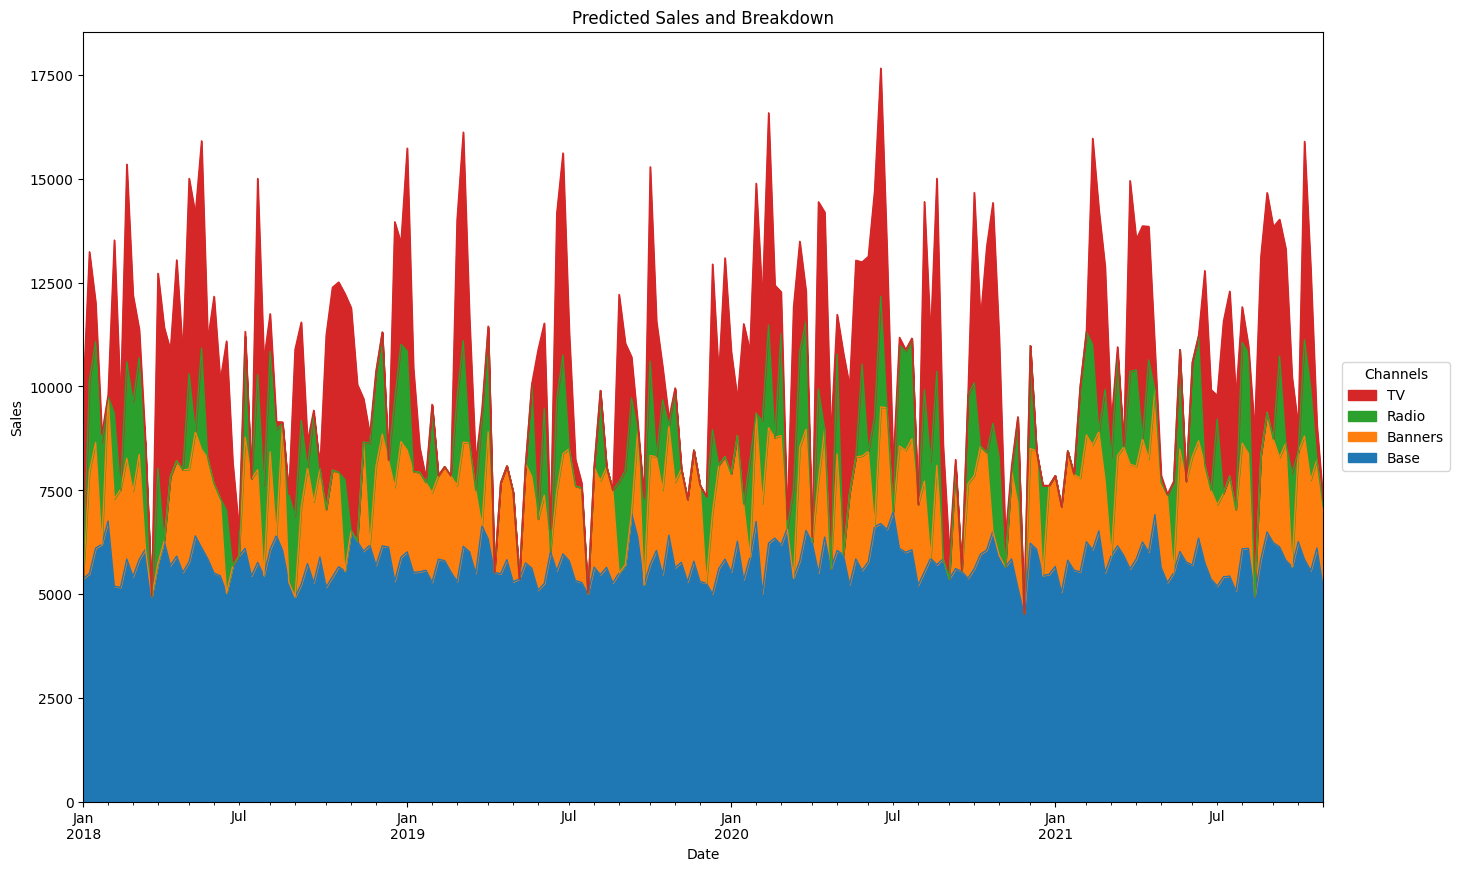

In [36]:
adstock_data = pd.DataFrame(
    tuned_model.best_estimator_.named_steps['adstock'].transform(X),
    columns=X.columns,
    index=X.index
)

weights = pd.Series(
    tuned_model.best_estimator_.named_steps['regression'].coef_,
    index=X.columns
)

base = tuned_model.best_estimator_.named_steps['regression'].intercept_

unadj_contributions = adstock_data.mul(weights).assign(Base=base)
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    )
ax = (adj_contributions[['Base', 'Banners', 'Radio', 'TV']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date'
      )
     )
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)